In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

# Population Simulation: The Last Man on Earth

Imagine a world where only one man and one million women remain. Each day, the man impregnates one woman, and each new baby is born instantly with a 50% chance of being male or female. This simulation models the daily male and female population counts over a given number of years.

## Updated Simulation Model

This version simulates population growth with the following real-world features:
- **Yearly time steps** (not daily)
- **Gestation period of 1 year**: Pregnancies this year result in births next year
- **Age distribution**: Initial women and the single man are distributed equally over ages 0–80
- **Fertility ranges**: Women (18–45), Men (18–60), all configurable
- **Fertility rate**: Each year, 365 × fertility_rate (default 0.9) pregnancies, limited by number of fertile women and presence of a fertile man
- **Births**: Babies are born the following year and added to age 0
- **Aging**: All people age by 1 year each year
- All parameters are configurable inputs to the function

The function returns arrays of yearly male and female population counts.

In [ ]:
def simulate_population_realistic(
    initial_females=10_000,
    years=5,
    initial_males=1,
    initial_man_age=20,
    daily_attempted_fertility=1,  # per male
    male_fertility_range=(18, 45),
    female_fertility_range=(18, 40),
    max_age=80,
    fertility_rate=0.9,
    male_feticide_rate=lambda year: 0,
    female_feticide_rate=lambda year: 0,
    female_death_rate=lambda age: 0,
    male_death_rate=lambda age: 0,
):

    # Age distributions: index = age, value = count
    female_ages = np.zeros(max_age + 1, dtype=int)
    male_ages = np.zeros(max_age + 1, dtype=int)
    # Distribute initial females equally over all ages
    for age in range(max_age + 1):
        female_ages[age] = initial_females // (max_age + 1)
    female_ages[0] += initial_females - female_ages.sum()  # Add remainder to age 0
    male_ages[initial_man_age] = initial_males
    # Pregnancies in progress = births_next_year
    births_next_year = 0
    rng = np.random.default_rng()
    male_counts = []
    female_counts = []
    for year in trange(years):
        # Apply death rates before aging
        for age in range(max_age + 1):
            female_ages[age] = int(female_ages[age] * (1 - female_death_rate(age)))
            male_ages[age] = int(male_ages[age] * (1 - male_death_rate(age)))

        # Age everyone by 1 year (oldest die)
        female_ages[1:] = female_ages[:-1]
        female_ages[0] = 0
        male_ages[1:] = male_ages[:-1]
        male_ages[0] = 0

        # Deliver the babies born this year (from last year's pregnancies)
        if births_next_year > 0:
            baby_genders = rng.integers(0, 2, size=births_next_year)
            female_ages[0] += int((baby_genders == 0).sum() * (1 - female_feticide_rate(year)))
            male_ages[0] += int((baby_genders == 1).sum() * (1 - male_feticide_rate(year)))

        # Set up pregnancies for next year
        fertile_women = female_ages[female_fertility_range[0]:female_fertility_range[1]+1].sum()
        fertile_women -= births_next_year  # Already Pregnant women are not fertile
        fertile_men = male_ages[male_fertility_range[0]:male_fertility_range[1]+1].sum()
        pregnancies = int(min(fertile_women, fertile_men*365*daily_attempted_fertility) * fertility_rate)
        births_next_year = pregnancies
        
        # 1 year passed by... assume
        # - whatever was done before was done at the start of the year
        # - whatever will be done next, will be done at the end of the year

        # Record population
        male_counts.append(male_ages.sum())
        female_counts.append(female_ages.sum())
    return np.array(male_counts), np.array(female_counts), male_ages, female_ages

# Example usage for 5 years:
male_arr, female_arr, male_ages, female_ages = simulate_population_realistic(years=100)
print(f"Final male count: {male_arr[-1]}")
print(f"Final female count: {female_arr[-1]}")

NameError: name 'np' is not defined

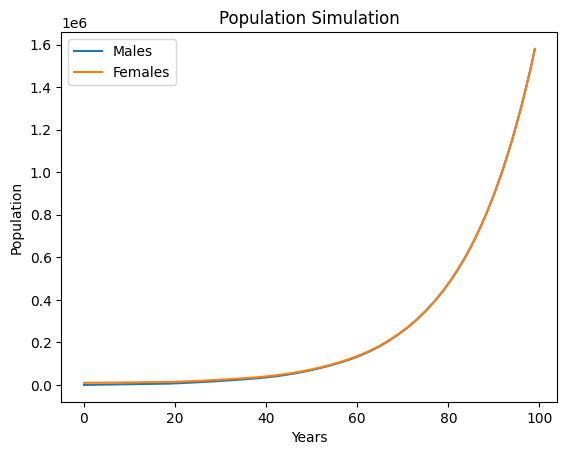

In [9]:
plt.plot(male_arr, label='Males')
plt.plot(female_arr, label='Females')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population Simulation')
plt.legend()

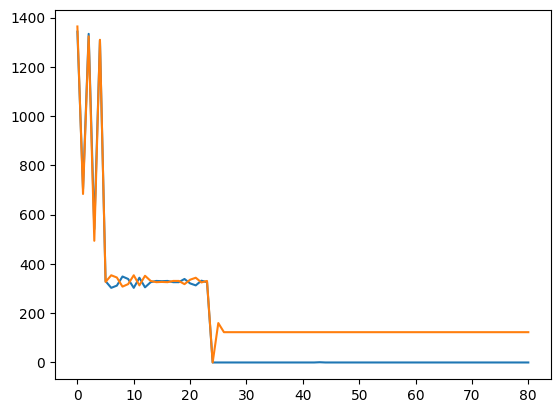

In [4]:
plt.plot(male_ages, label='Male Ages')
plt.plot(female_ages, label='Female Ages')